In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import gc
import io
import os
from itertools import combinations

from IPython.display import display
pd.set_option('display.max_columns', 99)
pd.set_option('display.max_rows', 200)

pd.reset_option('display.float_format')
pd.set_option('display.max_colwidth', None)  

from sitecustomize import ROOT # lib này được khởi tạo ban đầu dự án

import helpers.view as view
import helpers.EDA as EDA

importlib.reload(view)
importlib.reload(EDA)

<module 'helpers.EDA' from 'd:\\Data Science\\helpers\\EDA.py'>

In [93]:
def cache_clear():
    for var in list(globals()):  
        if var not in _keep_vars and not var.startswith("_"):  
            del globals()[var]  

    gc.collect()
_keep_vars = set(globals().keys())  # lưu biến gốc

# POS CASH balance (số dư khoản vay tiêu dùng - point of sale (cash loans ; comsumer loans))

In [94]:
pos_balance = pd.read_pickle(ROOT + "/data/pkl/pos_cash_balance.p")

In [95]:
des = pd.read_pickle(ROOT + "/data/pkl/description.p")
des_pos_balance = des[des["Table"] == "POS_CASH_balance"]

In [96]:
df_info = EDA.df_info(pos_balance).reset_index()
df_merged = pd.merge(df_info, des_pos_balance[["Row", "Description", "Special"]], 
                     left_on="index", right_on="Row", how="left").drop(columns=["Row"])
df_merged

Shape: (10001358, 8)


,index,DataType,#Nulls,#Uniques,Min,Mean,Std,Max,top10 val,top10 cnt,top10 ratio,Description,Special
0,SK_ID_PREV,int64,0,936325,1000001.0,1.903217e+06,535846.530722,2843499.0,"2059148, 1059693, 2230035, 2203514, 1800556, 2683477, 2818581, 1244267, 1217730, 1234270","96, 96, 96, 96, 96, 96, 96, 96, 96, 96","0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0",NaN,NaN
1,SK_ID_CURR,int64,0,337252,100001.0,2.784039e+05,102763.745090,456255.0,"265042, 172612, 309133, 127659, 185185, 197583, 203046, 362661, 398407, 228307","295, 247, 246, 245, 245, 245, 244, 239, 237, 235","0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0",ID of loan in our sample,NaN
2,MONTHS_BALANCE,int64,0,96,-96.0,-3.501259e+01,26.066570,-1.0,"-10, -11, -9, -12, -8, -13, -7, -14, -6, -15","216441, 216023, 215558, 214716, 214149, 210950, 210229, 208352, 206849, 204935","0.022, 0.022, 0.022, 0.021, 0.021, 0.021, 0.021, 0.021, 0.021, 0.02","Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )",time only relative to the application
3,CNT_INSTALMENT,float64,26071,73,1.0,1.708965e+01,11.995056,92.0,"12.0, 24.0, 10.0, 6.0, 18.0, 36.0, 8.0, 48.0, 4.0, 30.0","2496845, 1517472, 1243449, 1065500, 727394, 584574, 303751, 278513, 238223, 211920","0.25, 0.152, 0.124, 0.107, 0.073, 0.058, 0.03, 0.028, 0.024, 0.021",Term of previous credit (can change over time),NaN
4,CNT_INSTALMENT_FUTURE,float64,26087,79,0.0,1.048384e+01,11.109058,85.0,"0.0, 6.0, 4.0, 5.0, 3.0, 2.0, 1.0, 10.0, 8.0, 7.0","1185960, 614058, 613632, 600295, 582007, 547199, 512279, 481390, 480167, 472665","0.119, 0.061, 0.061, 0.06, 0.058, 0.055, 0.051, 0.048, 0.048, 0.047",Installments left to pay on the previous credit,NaN
5,NAME_CONTRACT_STATUS,object,0,9,NaN,NaN,NaN,NaN,"Active, Completed, Signed, Demand, Returned to the store, Approved, Amortized debt, Canceled, XNA","9151119, 744883, 87260, 7065, 5461, 4917, 636, 15, 2","0.915, 0.074, 0.009, 0.001, 0.001, 0.0, 0.0, 0.0, 0.0",Contract status during the month,NaN
6,SK_DPD,int64,0,3400,0.0,1.160693e+01,132.714043,4231.0,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9","9706131, 21872, 17358, 14403, 12350, 11046, 9615, 8332, 7360, 6668","0.97, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001",DPD (days past due) during the month of previous credit,NaN
7,SK_DPD_DEF,int64,0,2307,0.0,6.544684e-01,32.762491,3595.0,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9","9887389, 22134, 14690, 11652, 9528, 8031, 6629, 5425, 4538, 3935","0.989, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0, 0.0",DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit,NaN


array([[<Axes: title={'center': 'SK_ID_PREV'}>,
        <Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'MONTHS_BALANCE'}>],
       [<Axes: title={'center': 'CNT_INSTALMENT'}>,
        <Axes: title={'center': 'CNT_INSTALMENT_FUTURE'}>,
        <Axes: title={'center': 'SK_DPD'}>],
       [<Axes: title={'center': 'SK_DPD_DEF'}>, <Axes: >, <Axes: >]],
      dtype=object)

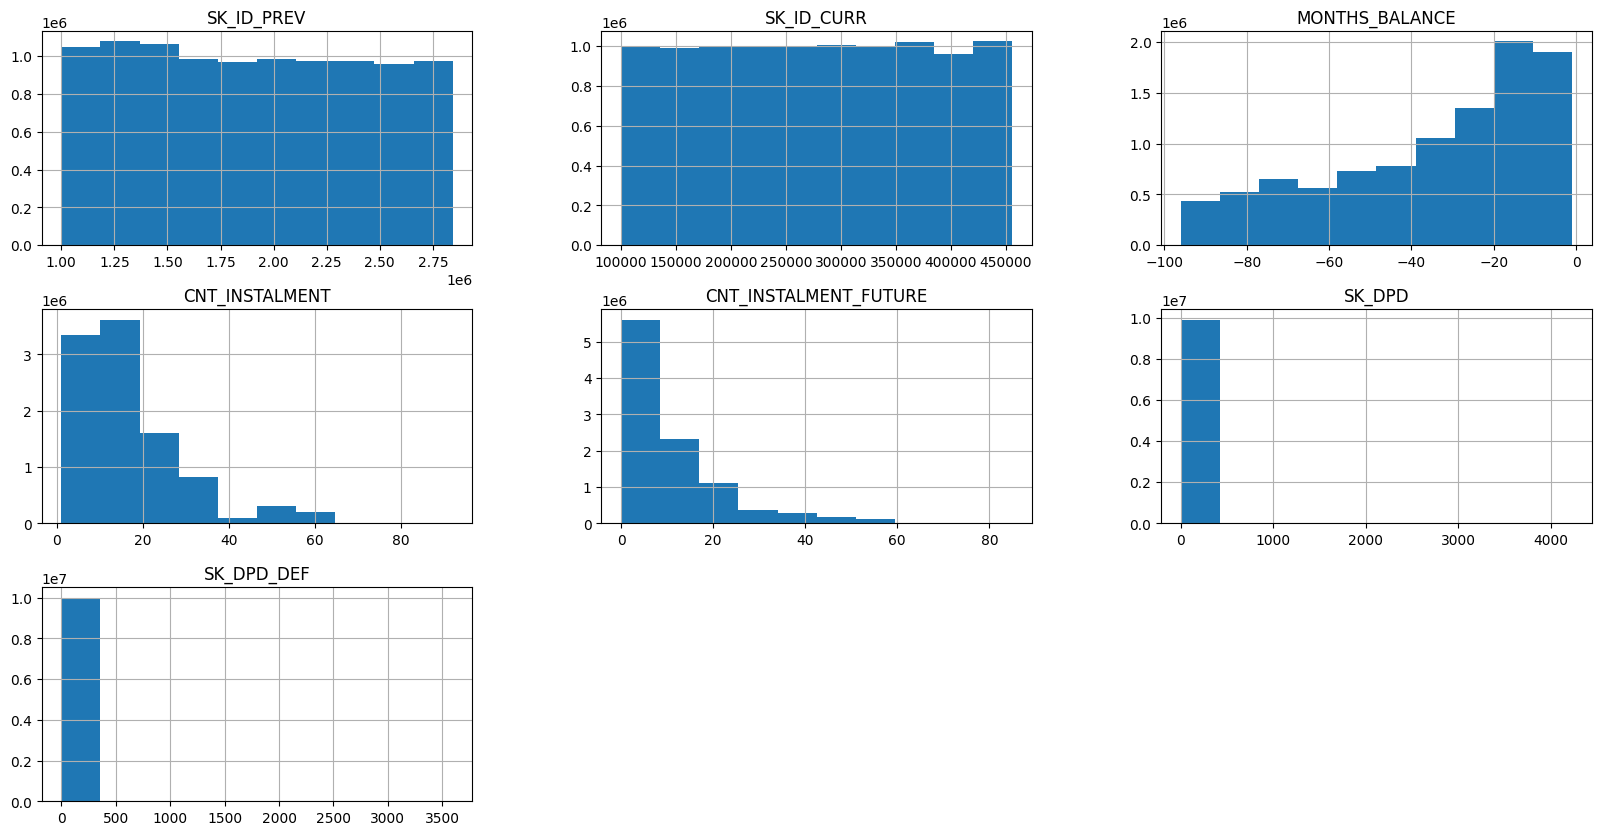

In [97]:
pos_balance.hist(figsize=(20, 10))

# join prev 

In [98]:
prev = pd.read_pickle(ROOT + "/data/pkl/previous_application.p")

In [99]:
prev[prev["SK_ID_CURR"]==172682]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
38285,1567825,172682,Consumer loans,11689.38,82755.0,90036.0,0.0,82755.0,THURSDAY,13,Y,1,0.0,NaN,NaN,XAP,Approved,-582,Cash through the bank,XAP,None,New,Mobile,POS,XNA,Country-wide,48,Connectivity,10.0,high,POS mobile with interest,365243.0,-543.0,-273.0,-273.0,-271.0,0.0
94805,2324325,172682,Cash loans,NaN,0.0,0.0,NaN,NaN,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Canceled,-196,XNA,XAP,None,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
view.html_view(pos_balance[pos_balance["SK_ID_CURR"]==172682].sort_values(["SK_ID_PREV"]))

SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1567825,172682,-14,10.0,5.0,Active,0,0
1567825,172682,-12,10.0,3.0,Active,0,0
1567825,172682,-17,10.0,8.0,Active,0,0
1567825,172682,-16,10.0,7.0,Active,0,0
1567825,172682,-19,10.0,10.0,Active,0,0
1567825,172682,-15,10.0,6.0,Active,0,0
1567825,172682,-9,10.0,0.0,Completed,0,0
1567825,172682,-18,10.0,9.0,Active,0,0
1567825,172682,-13,10.0,4.0,Active,0,0
1567825,172682,-10,10.0,1.0,Active,0,0


* prev chứa khoản vay không có trong pos_balance (có thể trong credit_card_balance), pos_balance cũng chứa những khoản vay không có trong prev

In [101]:
EDA.df_info(pos_balance[(pos_balance["CNT_INSTALMENT"].isnull())])

Shape: (26071, 8)


,DataType,#Nulls,#Uniques,Min,Mean,Std,Max,top10 val,top10 cnt,top10 ratio
SK_ID_PREV,int64,0,23307,1000033.0,1.905111e+06,535473.974001,2843313.0,"1770932, 1769939, 2408885, 1598330, 1531600, 2039145, 1825380, 2585571, 1480229, 1008221","71, 42, 42, 32, 27, 24, 23, 22, 21, 21","0.003, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001"
SK_ID_CURR,int64,0,22104,100005.0,2.767787e+05,102380.596408,456251.0,"441177, 264254, 142212, 186130, 103793, 111879, 224435, 182036, 223637, 281543","71, 42, 42, 32, 27, 24, 23, 22, 21, 21","0.003, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001"
MONTHS_BALANCE,int64,0,76,-76.0,-1.807894e+01,10.962218,-1.0,"-10, -11, -12, -8, -6, -9, -14, -15, -16, -13","981, 963, 962, 895, 880, 869, 857, 853, 847, 835","0.038, 0.037, 0.037, 0.034, 0.034, 0.033, 0.033, 0.033, 0.032, 0.032"
CNT_INSTALMENT,float64,26071,0,NaN,NaN,NaN,NaN,,,
CNT_INSTALMENT_FUTURE,float64,25974,12,4.0,1.476289e+01,12.814196,60.0,"12.0, 6.0, 10.0, 24.0, 4.0, 18.0, 48.0, 60.0, 36.0, 8.0","27, 22, 16, 6, 6, 6, 4, 3, 3, 2","0.001, 0.001, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0"
NAME_CONTRACT_STATUS,object,0,6,NaN,NaN,NaN,NaN,"Signed, Returned to the store, Approved, Active, Canceled, XNA","20266, 2961, 2804, 26, 12, 2","0.777, 0.114, 0.108, 0.001, 0.0, 0.0"
SK_DPD,int64,0,1,0.0,0.000000e+00,0.000000,0.0,0,26071,1.0
SK_DPD_DEF,int64,0,1,0.0,0.000000e+00,0.000000,0.0,0,26071,1.0


# NAME_CONTRACT_STATUS

In [102]:
id = pos_balance[(pos_balance["NAME_CONTRACT_STATUS"]=='Signed')]["SK_ID_PREV"].unique()
view.html_view(pos_balance[pos_balance["SK_ID_PREV"].isin(id)].sort_values(["SK_ID_PREV", "MONTHS_BALANCE"]).head(100))

SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1000060,191890,-14,8.0,8.0,Signed,0,0
1000060,191890,-13,8.0,8.0,Active,0,0
1000060,191890,-12,8.0,7.0,Active,0,0
1000060,191890,-11,8.0,6.0,Active,0,0
1000060,191890,-10,8.0,5.0,Active,0,0
1000060,191890,-9,8.0,3.0,Active,0,0
1000060,191890,-8,8.0,3.0,Active,0,0
1000060,191890,-7,7.0,1.0,Active,0,0
1000060,191890,-6,7.0,0.0,Completed,0,0
1000069,143724,-13,12.0,12.0,Signed,0,0


In [103]:
EDA.df_info(pos_balance[(pos_balance["NAME_CONTRACT_STATUS"]=='Signed')])

Shape: (87260, 8)


,DataType,#Nulls,#Uniques,Min,Mean,Std,Max,top10 val,top10 cnt,top10 ratio
SK_ID_PREV,int64,0,78383,1000060.0,1.904138e+06,536003.301422,2843483.0,"1770932, 2408885, 1769939, 1598330, 2120935, 1944898, 2717393, 2571258, 2430564, 1636605","71, 42, 42, 32, 29, 29, 29, 29, 29, 29","0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0"
SK_ID_CURR,int64,0,67716,100005.0,2.775163e+05,102635.892034,456251.0,"441177, 264254, 142212, 186130, 215170, 284373, 408407, 283956, 305218, 165508","71, 42, 42, 32, 30, 30, 30, 30, 29, 29","0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0"
MONTHS_BALANCE,int64,0,96,-96.0,-3.869922e+01,25.147745,-1.0,"-12, -11, -17, -10, -15, -16, -18, -13, -14, -19","1718, 1634, 1611, 1605, 1589, 1568, 1557, 1533, 1520, 1495","0.02, 0.019, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.017, 0.017"
CNT_INSTALMENT,float64,20266,50,1.0,1.352848e+01,10.699686,61.0,"12.0, 6.0, 10.0, 24.0, 4.0, 18.0, 5.0, 8.0, 36.0, 9.0","16221, 11915, 8421, 5659, 5049, 3441, 2533, 2399, 2354, 1505","0.186, 0.137, 0.097, 0.065, 0.058, 0.039, 0.029, 0.027, 0.027, 0.017"
CNT_INSTALMENT_FUTURE,float64,20291,62,0.0,1.321016e+01,10.773091,61.0,"12.0, 6.0, 10.0, 24.0, 4.0, 18.0, 5.0, 8.0, 36.0, 9.0","15157, 11467, 8042, 5313, 5276, 3206, 2902, 2459, 2203, 1568","0.174, 0.131, 0.092, 0.061, 0.06, 0.037, 0.033, 0.028, 0.025, 0.018"
NAME_CONTRACT_STATUS,object,0,1,NaN,NaN,NaN,NaN,Signed,87260,1.0
SK_DPD,int64,0,29,0.0,2.242723e-02,1.325826,233.0,"0, 1, 19, 2, 3, 4, 18, 23, 16, 13","87148, 14, 11, 10, 8, 7, 7, 6, 6, 5","0.999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0"
SK_DPD_DEF,int64,0,15,0.0,2.830621e-03,0.195595,23.0,"0, 1, 2, 4, 3, 19, 13, 5, 16, 7","87218, 14, 7, 4, 3, 3, 2, 2, 1, 1","1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0"


* signed chứa rất nhiều CNT_INSTALMENT = null, hợp đồng mới ký và chưa giải ngân?

In [104]:
EDA.df_info(pos_balance[(pos_balance["NAME_CONTRACT_STATUS"]=='Completed')])

Shape: (744883, 8)


,DataType,#Nulls,#Uniques,Min,Mean,Std,Max,top10 val,top10 cnt,top10 ratio
SK_ID_PREV,int64,0,698704,1000001.0,1.900116e+06,536569.779533,2843499.0,"2556244, 1488983, 1925601, 2746020, 1106504, 1010248, 2411999, 1061588, 1594618, 2397609","86, 80, 77, 76, 76, 59, 59, 59, 59, 59","0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0"
SK_ID_CURR,int64,0,300240,100001.0,2.783393e+05,102868.930393,456255.0,"339186, 440354, 421674, 376955, 270219, 108184, 303875, 272779, 361226, 206413","86, 85, 81, 78, 77, 67, 65, 64, 63, 63","0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0"
MONTHS_BALANCE,int64,0,96,-96.0,-3.253752e+01,25.418949,-1.0,"-8, -10, -6, -5, -9, -7, -11, -12, -4, -13","18475, 18468, 18453, 18065, 17985, 17883, 17832, 17245, 16931, 16170","0.025, 0.025, 0.025, 0.024, 0.024, 0.024, 0.024, 0.023, 0.023, 0.022"
CNT_INSTALMENT,float64,0,66,1.0,9.303241e+00,5.540769,72.0,"6.0, 12.0, 10.0, 4.0, 8.0, 5.0, 9.0, 7.0, 11.0, 3.0","128715, 121685, 95756, 62732, 44094, 43458, 29848, 27629, 27353, 25546","0.173, 0.163, 0.129, 0.084, 0.059, 0.058, 0.04, 0.037, 0.037, 0.034"
CNT_INSTALMENT_FUTURE,float64,0,4,0.0,4.430226e-05,0.019284,10.0,"0.0, 8.0, 7.0, 10.0","744879, 2, 1, 1","1.0, 0.0, 0.0, 0.0"
NAME_CONTRACT_STATUS,object,0,1,NaN,NaN,NaN,NaN,Completed,744883,1.0
SK_DPD,int64,0,2209,0.0,2.480336e+01,228.230570,3988.0,"0, 1638, 1559, 1465, 1602, 1647, 1579, 2247, 1084, 1174","734736, 41, 40, 40, 39, 39, 39, 38, 37, 37","0.986, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0"
SK_DPD_DEF,int64,0,65,0.0,2.302603e-01,20.640483,2618.0,"0, 847, 1028, 1888, 1827, 2192, 2253, 1949, 1980, 2345","744777, 18, 18, 2, 2, 2, 2, 2, 2, 2","1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0"


* completed thì số CNT_INSTALMENT_FUTURE phải bằng 0 vì đã trả xong rồi

In [105]:
id = pos_balance[(pos_balance["NAME_CONTRACT_STATUS"]=='Completed') & (pos_balance["CNT_INSTALMENT_FUTURE"]!=0)]["SK_ID_PREV"].unique()
view.html_view(pos_balance[pos_balance["SK_ID_PREV"].isin(id)].sort_values(["SK_ID_PREV", "MONTHS_BALANCE"]))

SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1134377,397682,-95,10.0,10.0,Completed,0,0
1134377,397682,-94,10.0,9.0,Active,0,0
1134377,397682,-93,10.0,8.0,Active,0,0
1134377,397682,-92,10.0,7.0,Active,0,0
1134377,397682,-91,10.0,6.0,Active,0,0
1134377,397682,-90,10.0,5.0,Active,0,0
1134377,397682,-89,10.0,4.0,Active,0,0
1134377,397682,-88,10.0,3.0,Active,0,0
1134377,397682,-87,10.0,2.0,Active,0,0
1134377,397682,-86,10.0,1.0,Active,0,0


* lỗi dữ liệu

In [106]:
pos_balance.loc[(["NAME_CONTRACT_STATUS"]=='Completed') & (pos_balance["CNT_INSTALMENT_FUTURE"]!=0), "CNT_INSTALMENT_FUTURE"] = "Active" ####### sửa

C:\Users\Admin\AppData\Local\Temp\ipykernel_10336\2046332741.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Active' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  pos_balance.loc[(["NAME_CONTRACT_STATUS"]=='Completed') & (pos_balance["CNT_INSTALMENT_FUTURE"]!=0), "CNT_INSTALMENT_FUTURE"] = "Active" ####### sửa


In [107]:
id = pos_balance[(pos_balance["NAME_CONTRACT_STATUS"]=='Active') & (pos_balance["CNT_INSTALMENT_FUTURE"]==0)]["SK_ID_PREV"].unique()  # lỗi dữ liệu khi status = Active và CNT_INSTALMENT_FUTURE=0
view.html_view(pos_balance[pos_balance["SK_ID_PREV"].isin(id)].sort_values(["SK_ID_PREV", "MONTHS_BALANCE"]).head(100))

SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1000020,299072,-66,12.0,12.0,Active,0,0
1000020,299072,-65,12.0,11.0,Active,0,0
1000020,299072,-64,12.0,10.0,Active,0,0
1000020,299072,-63,12.0,9.0,Active,0,0
1000020,299072,-62,12.0,8.0,Active,0,0
1000020,299072,-61,12.0,7.0,Active,0,0
1000020,299072,-60,12.0,6.0,Active,0,0
1000020,299072,-59,12.0,5.0,Active,0,0
1000020,299072,-58,12.0,4.0,Active,0,0
1000020,299072,-57,12.0,3.0,Active,0,0


* lỗi dữ liệu

In [108]:
pos_balance.loc[((pos_balance["NAME_CONTRACT_STATUS"]=='Active') & (pos_balance["CNT_INSTALMENT_FUTURE"]==0)), 'NAME_CONTRACT_STATUS'] = 'Completed' ####### sửa

# CNT_INSTALMENT_FUTURE = 0?

In [109]:
pos_balance_0 = pos_balance[pos_balance['CNT_INSTALMENT_FUTURE']==0].copy()
pos_balance_1 = pos_balance[pos_balance['CNT_INSTALMENT_FUTURE']>0].copy()

In [110]:
id = pos_balance_0[pos_balance_0["NAME_CONTRACT_STATUS"] != 'Completed']["SK_ID_PREV"].unique()

In [111]:
view.html_view(pos_balance[pos_balance["SK_ID_PREV"].isin(id)].sort_values(["SK_ID_PREV", "MONTHS_BALANCE"]).head(1000))

SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1000176,409549,-67,10.0,10.0,Active,0,0
1000176,409549,-66,10.0,9.0,Active,0,0
1000176,409549,-65,10.0,8.0,Active,11,11
1000176,409549,-64,10.0,7.0,Active,0,0
1000176,409549,-63,10.0,6.0,Active,0,0
1000176,409549,-62,10.0,5.0,Active,0,0
1000176,409549,-61,10.0,4.0,Active,13,13
1000176,409549,-60,10.0,3.0,Active,44,44
1000176,409549,-59,10.0,2.0,Active,72,72
1000176,409549,-58,10.0,1.0,Active,103,103


* dữ liệu bị duplicate nhiều

# duplicate

In [112]:
view.html_view(pos_balance[pos_balance["SK_ID_PREV"]==2601827].sort_values(["MONTHS_BALANCE"]))

SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2601827,416017,-84,4.0,4.0,Active,0,0
2601827,416017,-83,4.0,3.0,Active,0,0
2601827,416017,-82,4.0,2.0,Active,0,0
2601827,416017,-81,4.0,1.0,Active,0,0
2601827,416017,-80,4.0,0.0,Completed,0,0
2601827,416017,-79,4.0,0.0,Completed,0,0
2601827,416017,-78,4.0,0.0,Completed,0,0
2601827,416017,-77,4.0,0.0,Completed,0,0
2601827,416017,-76,4.0,0.0,Completed,0,0
2601827,416017,-75,4.0,0.0,Completed,0,0


* khoản vay đã completed nhưng vẫn tồn tại nhiều bản ghi duplicated

In [113]:
pos_balance_0.sort_values(['SK_ID_PREV', 'MONTHS_BALANCE'], ascending=[True, False], inplace=True)

In [114]:
pos_balance_0.drop_duplicates(['SK_ID_PREV', "NAME_CONTRACT_STATUS"], keep='last', inplace=True)

In [115]:
pos_balance = pd.concat([pos_balance_0, pos_balance_1], ignore_index=True)

In [116]:
cache_clear()

In [117]:
view.html_view(pos_balance[pos_balance["SK_ID_PREV"].isin(id)].sort_values(["SK_ID_PREV", "MONTHS_BALANCE"]).head(1000))

SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1000176,409549,-67,10.0,10.0,Active,0,0
1000176,409549,-66,10.0,9.0,Active,0,0
1000176,409549,-65,10.0,8.0,Active,11,11
1000176,409549,-64,10.0,7.0,Active,0,0
1000176,409549,-63,10.0,6.0,Active,0,0
1000176,409549,-62,10.0,5.0,Active,0,0
1000176,409549,-61,10.0,4.0,Active,13,13
1000176,409549,-60,10.0,3.0,Active,44,44
1000176,409549,-59,10.0,2.0,Active,72,72
1000176,409549,-58,10.0,1.0,Active,103,103


* oke